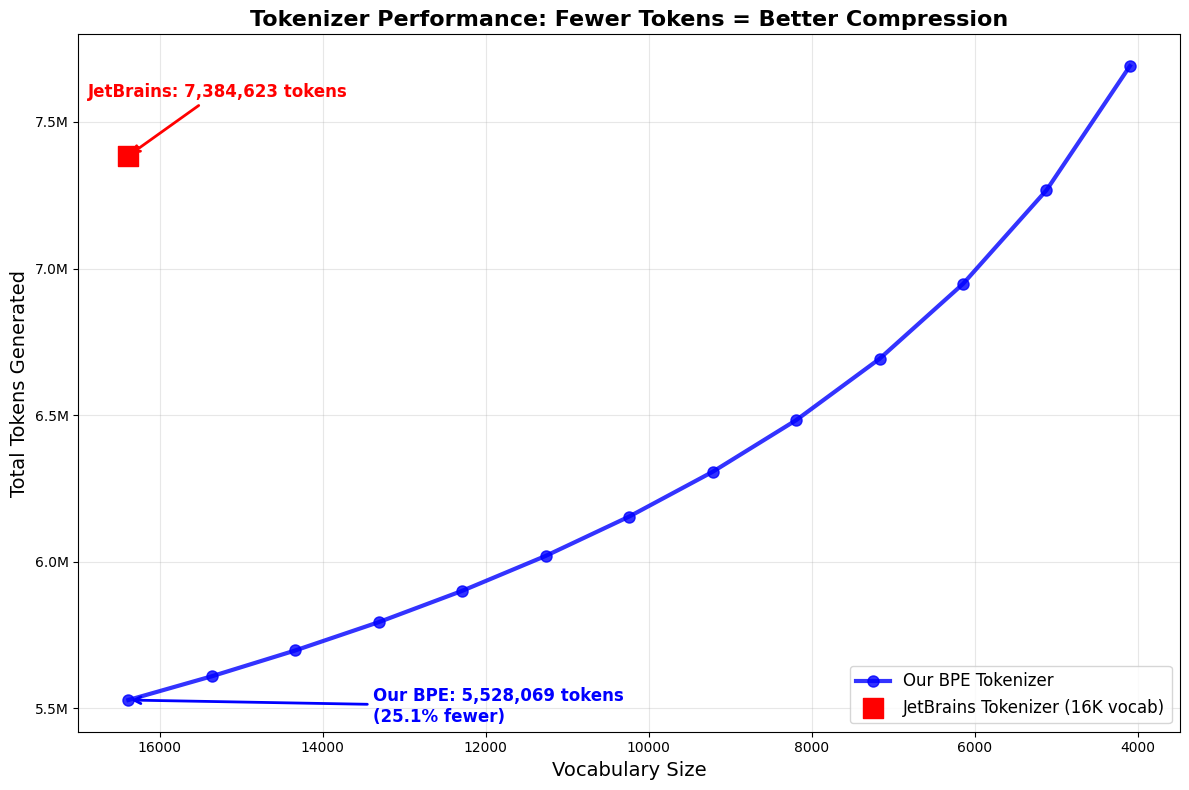

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_tokenizer_comparison_chart(vocab_sizes, token_counts, jb_tokens, jb_vocab=16384):
    plt.figure(figsize=(12, 8))
    
    # Plot our tokenizer performance curve
    plt.plot(vocab_sizes, token_counts, 'b-o', label='Our BPE Tokenizer', 
             linewidth=3, markersize=8, alpha=0.8)
    
    # Highlight the JetBrains' tokenizer at same vocab size
    plt.scatter([jb_vocab], [jb_tokens], color='red', s=200, 
               label='JetBrains Tokenizer (16K vocab)', zorder=5, marker='s')
    
    # Add annotation for the competing tokenizer
    plt.annotate(f'JetBrains: {jb_tokens:,} tokens', 
                xy=(jb_vocab, jb_tokens),
                xytext=(jb_vocab + 500, jb_tokens + 200000),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=12, color='red', fontweight='bold')
    
    # Find our tokenizer's performance at 16K vocab
    if jb_vocab in vocab_sizes:
        idx = vocab_sizes.index(jb_vocab)
        our_16k_tokens = token_counts[idx]
        improvement = jb_tokens - our_16k_tokens
        improvement_pct = (improvement / jb_tokens) * 100
        
        plt.annotate(f'Our BPE: {our_16k_tokens:,} tokens\n({improvement_pct:.1f}% fewer)', 
                    xy=(jb_vocab, our_16k_tokens),
                    xytext=(jb_vocab - 3000, our_16k_tokens - 75000),
                    arrowprops=dict(arrowstyle='->', color='blue', lw=2),
                    fontsize=12, color='blue', fontweight='bold')
    
    plt.xlabel('Vocabulary Size', fontsize=14)
    plt.ylabel('Total Tokens Generated', fontsize=14)
    plt.title('Tokenizer Performance: Fewer Tokens = Better Compression', fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    
    # Format y-axis to show values in millions
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
    
    # Invert vocab_sizes for better visual flow (largest to smallest)
    plt.gca().invert_xaxis()
    
    plt.tight_layout()
    plt.show()

# Example usage:
vocab_sizes = [16384, 15360, 14336, 13312, 12288, 11264, 10240, 9216, 8192, 7168, 6144, 5120, 4096]
our_token_counts = [5528069, 5609097, 5697169, 5793723, 5900510, 6019657, 6153773, 6306433, 6482521, 6691997, 6947531, 7266977, 7690643]
jb_token_count = 7384623
plot_tokenizer_comparison_chart(vocab_sizes, our_token_counts, jb_token_count)

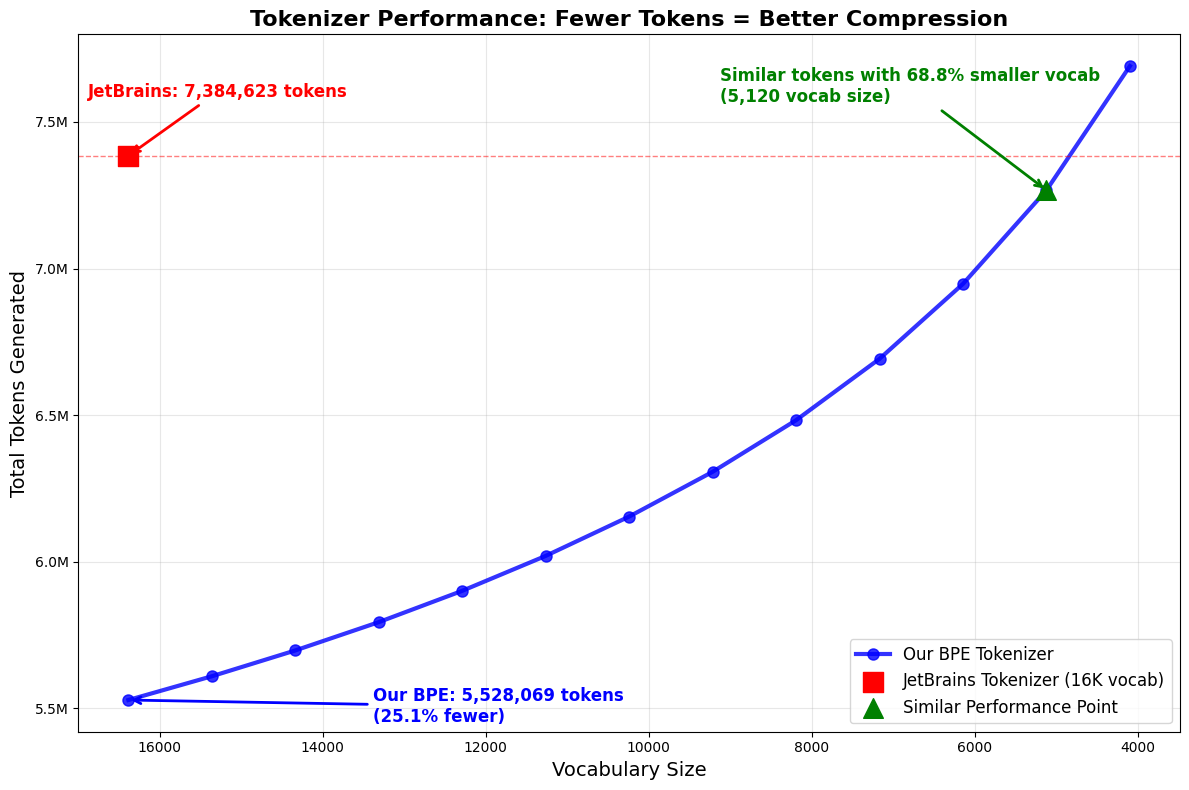

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_tokenizer_comparison_chart(vocab_sizes, token_counts, jb_tokens, jb_vocab=16384):
    plt.figure(figsize=(12, 8))
    
    # Plot our tokenizer performance curve
    plt.plot(vocab_sizes, token_counts, 'b-o', label='Our BPE Tokenizer', 
             linewidth=3, markersize=8, alpha=0.8)
    
    # Highlight the JetBrains' tokenizer at same vocab size
    plt.scatter([jb_vocab], [jb_tokens], color='red', s=200, 
               label='JetBrains Tokenizer (16K vocab)', zorder=5, marker='s')
    
    # Find intersection point where our tokenizer matches JB's performance
    closest_idx = None
    min_diff = float('inf')
    for i, tokens in enumerate(token_counts):
        diff = abs(tokens - jb_tokens)
        if diff < min_diff:
            min_diff = diff
            closest_idx = i
    
    if closest_idx is not None:
        intersect_vocab = vocab_sizes[closest_idx]
        intersect_tokens = token_counts[closest_idx]
        vocab_savings = jb_vocab - intersect_vocab
        vocab_savings_pct = (vocab_savings / jb_vocab) * 100
        
        # Highlight intersection point
        plt.scatter([intersect_vocab], [intersect_tokens], color='green', s=200, 
                   label=f'Similar Performance Point', zorder=5, marker='^')
        
        # Add annotation for intersection
        plt.annotate(f'Similar tokens with {vocab_savings_pct:.1f}% smaller vocab\n({intersect_vocab:,} vocab size)', 
                    xy=(intersect_vocab, intersect_tokens),
                    xytext=(intersect_vocab + 4000, intersect_tokens + 300000),
                    arrowprops=dict(arrowstyle='->', color='green', lw=2),
                    fontsize=12, color='green', fontweight='bold')
    
    # Add annotation for the JB's tokenizer
    plt.annotate(f'JetBrains: {jb_tokens:,} tokens', 
                xy=(jb_vocab, jb_tokens),
                xytext=(jb_vocab + 500, jb_tokens + 200000),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=12, color='red', fontweight='bold')
    
    # Find our tokenizer's performance at 16K vocab
    if jb_vocab in vocab_sizes:
        idx = vocab_sizes.index(jb_vocab)
        our_16k_tokens = token_counts[idx]
        improvement = jb_tokens - our_16k_tokens
        improvement_pct = (improvement / jb_tokens) * 100
        
        plt.annotate(f'Our BPE: {our_16k_tokens:,} tokens\n({improvement_pct:.1f}% fewer)', 
                    xy=(jb_vocab, our_16k_tokens),
                    xytext=(jb_vocab - 3000, our_16k_tokens - 75000),
                    arrowprops=dict(arrowstyle='->', color='blue', lw=2),
                    fontsize=12, color='blue', fontweight='bold')
    
    # Add horizontal line to show cJB's tokenizer performance level
    plt.axhline(y=jb_tokens, color='red', linestyle='--', alpha=0.5, linewidth=1)
    
    plt.xlabel('Vocabulary Size', fontsize=14)
    plt.ylabel('Total Tokens Generated', fontsize=14)
    plt.title('Tokenizer Performance: Fewer Tokens = Better Compression', fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    
    # Format y-axis to show values in millions
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
    
    # Invert vocab_sizes for better visual flow (largest to smallest)
    plt.gca().invert_xaxis()
    
    plt.tight_layout()
    plt.show()

# Your data
vocab_sizes = [16384, 15360, 14336, 13312, 12288, 11264, 10240, 9216, 8192, 7168, 6144, 5120, 4096]
our_token_counts = [5528069, 5609097, 5697169, 5793723, 5900510, 6019657, 6153773, 6306433, 6482521, 6691997, 6947531, 7266977, 7690643]
jb_token_count = 7384623

plot_tokenizer_comparison_chart(vocab_sizes, our_token_counts, jb_token_count)